In [1]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Using cached ujson-4.0.2-cp37-cp37m-manylinux1_x86_64.whl (179 kB)
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644255 sha256=9ed3ff064dc4eb416d2add859ed037b9d4fc3737eb01e17746c6d1d1130525cb
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from prophet import Prophet

In [4]:
df = pd.read_csv('../input/uspollution/pollution_us_2000_2016.csv')
display(df)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [5]:
df = df.drop(columns=['Unnamed: 0', 'NO2 Units', 'O3 Units', 'SO2 Units', 'CO Units'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Mean           float64
 9   NO2 1st Max Value  float64
 10  NO2 1st Max Hour   int64  
 11  NO2 AQI            int64  
 12  O3 Mean            float64
 13  O3 1st Max Value   float64
 14  O3 1st Max Hour    int64  
 15  O3 AQI             int64  
 16  SO2 Mean           float64
 17  SO2 1st Max Value  float64
 18  SO2 1st Max Hour   int64  
 19  SO2 AQI            float64
 20  CO Mean            float64
 21  CO 1st Max Value   float64
 22  CO 1st Max Hour    int64  
 23  CO AQI             float64
dtypes: float64(10), int64(9), object(5)
memory usage: 

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741629 entries, 0 to 1746660
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Mean           float64
 9   NO2 1st Max Value  float64
 10  NO2 1st Max Hour   int64  
 11  NO2 AQI            int64  
 12  O3 Mean            float64
 13  O3 1st Max Value   float64
 14  O3 1st Max Hour    int64  
 15  O3 AQI             int64  
 16  SO2 Mean           float64
 17  SO2 1st Max Value  float64
 18  SO2 1st Max Hour   int64  
 19  SO2 AQI            float64
 20  CO Mean            float64
 21  CO 1st Max Value   float64
 22  CO 1st Max Hour    int64  
 23  CO AQI             float64
dtypes: float64(10), int64(9), object(5)
memory usage: 

In [9]:
df.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,871285.000000,1.741629e+06,1.741629e+06,1.741629e+06,870641.000000
mean,2.227342e+01,7.161298e+01,1.120184e+03,1.282225e+01,2.541112e+01,1.172808e+01,2.389458e+01,2.611990e-02,3.919667e-02,1.016794e+01,3.603631e+01,1.872209e+00,4.496270e+00,9.663176e+00,7.121317,3.683295e-01,6.203171e-01,7.872603e+00,5.995909
std,1.724575e+01,7.954513e+01,2.004000e+03,9.509134e+00,1.599956e+01,7.876583e+00,1.516127e+01,1.136705e-02,1.533386e-02,4.002038e+00,1.974284e+01,2.762601e+00,7.685450e+00,6.729269e+00,11.942978,3.139755e-01,6.438836e-01,7.977721e+00,5.845416
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.571430e-01,9.000000e-01,5.000000e+00,1.000000,1.833330e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.939130e-01,4.000000e-01,6.000000e+00,5.000000
75%,4.000000e+01,9.700000e+01,1.039000e+03,1.771429e+01,3.560000e+01,2.000000e+01,3.300000e+01,3.388900e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.328571e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [10]:
# check for unique state in the data
df['State'].nunique()

47

In [11]:
# check for unique country in the data
df['County'].nunique()

133

In [12]:
# check for unique City in the data
df['City'].nunique()

144

In [13]:
# check for missing value 
df.isna().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              870344
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               870988
dtype: int64

In [14]:
# convert Date local to python date and time 
df['date'] =  pd.to_datetime(df['Date Local'])

#delete original data column
df = df.drop(columns=['Date Local'])

# check descriptive statistics for date
df['date'].describe(datetime_is_numeric=True)

count                          1741629
mean     2008-10-12 22:57:38.410488320
min                2000-01-01 00:00:00
25%                2004-11-20 00:00:00
50%                2009-01-31 00:00:00
75%                2012-11-07 00:00:00
max                2016-05-31 00:00:00
Name: date, dtype: object

In [15]:
display(df)

,State Code,County Code,Site Num,Address,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,date
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,19.041667,49.0,19,...,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN,2000-01-01
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,19.041667,49.0,19,...,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0,2000-01-01
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,19.041667,49.0,19,...,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN,2000-01-01
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,19.041667,49.0,19,...,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0,2000-01-01
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,22.958333,36.0,19,...,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN,2000-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,1.083333,1.6,9,...,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0,2016-03-30
1746657,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.939130,1.3,5,...,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN,2016-03-31
1746658,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.939130,1.3,5,...,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0,2016-03-31
1746659,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,0.939130,1.3,5,...,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN,2016-03-31


In [16]:
# compute mean AQI for each citiy for each date
mean_aqi = df.groupby(['City','date'])[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].mean()

# check new data frame
mean_aqi.head(3)

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
City        date                                        
Albuquerque 2011-01-01     19.0    30.0      0.0     2.0
            2011-01-02     38.0    28.0      1.0     7.0
            2011-01-03     44.0    14.0      3.0    13.0

In [17]:
# check data shape
mean_aqi.shape

(359263, 4)

In [18]:
# check descriptive statistics
mean_aqi.describe()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
count,359263.000000,359263.000000,359263.000000,359089.000000
mean,24.235140,36.149585,7.512030,6.100780
std,14.913906,19.902530,12.302273,5.957218
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,25.000000,1.000000,2.000000
50%,23.000000,33.000000,3.000000,5.000000
75%,33.500000,42.000000,9.000000,8.000000
max,132.000000,218.000000,200.000000,201.000000


In [19]:
# check na counts
mean_aqi.isna().sum()

NO2 AQI      0
O3 AQI       0
SO2 AQI      0
CO AQI     174
dtype: int64

In [20]:
# reset index mean_aqi 
mean_aqi = mean_aqi.reset_index()

In [21]:
# select one single city for analysis and for developing proof of concepts
city = 'Washington'

# select one column for analysis and for developing proof of concepts
col = 'O3 AQI'

In [22]:
# create subset of dataset to include only city and column selected for analysis
new_df = mean_aqi.loc[mean_aqi['City'] == city,['date',col]]

# check data
new_df.head(3)

,date,O3 AQI
335183,2000-01-01,12.0
335184,2000-01-02,25.0
335185,2000-01-03,22.0


In [23]:
new_df = new_df.rename(columns = {"date": "ds",
                        "O3 AQI": "y"})
display(new_df)

,ds,y
335183,2000-01-01,12.0
335184,2000-01-02,25.0
335185,2000-01-03,22.0
335186,2000-01-04,20.0
335187,2000-01-05,21.0
...,...,...
340969,2016-04-26,51.0
340970,2016-04-27,29.0
340971,2016-04-28,27.0
340972,2016-04-29,23.0


In [24]:
# ts shape
new_df.shape

(5791, 2)

In [25]:
# resample time series to Daily Frequency
# resample ensures that all dates from begining to end of the start series are present
# use ffill  forward fill to handle missing valye filling the missing value from the previous day
new_df = new_df.ffill()
new_df.head(3)

,ds,y
335183,2000-01-01,12.0
335184,2000-01-02,25.0
335185,2000-01-03,22.0


In [27]:
display(new_df)

,ds,y
335183,2000-01-01,12.0
335184,2000-01-02,25.0
335185,2000-01-03,22.0
335186,2000-01-04,20.0
335187,2000-01-05,21.0
...,...,...
340969,2016-04-26,51.0
340970,2016-04-27,29.0
340971,2016-04-28,27.0
340972,2016-04-29,23.0


<AxesSubplot:xlabel='ds'>

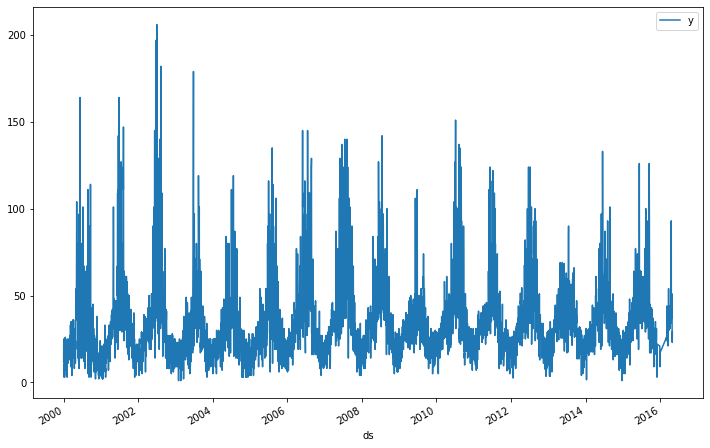

In [28]:
# visualize dataframe
new_df.plot(x ='ds', y='y', kind = 'line', figsize=(12,8))


In [29]:
prophet_model = Prophet()
prophet_model.fit(new_df)

In [30]:
# the parameter 'periods' represents the number of days you want to predict
future = prophet_model.make_future_dataframe(periods=2000)
future.tail()

,ds
7786,2021-10-17
7787,2021-10-18
7788,2021-10-19
7789,2021-10-20
7790,2021-10-21


In [31]:
forecast = prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7786,2021-10-17,26.843872,1.464619,52.374254
7787,2021-10-18,25.439220,0.420890,52.550896
7788,2021-10-19,26.582017,-0.475945,54.421232
7789,2021-10-20,25.682555,0.213605,51.573692
7790,2021-10-21,26.096047,2.860692,53.705353


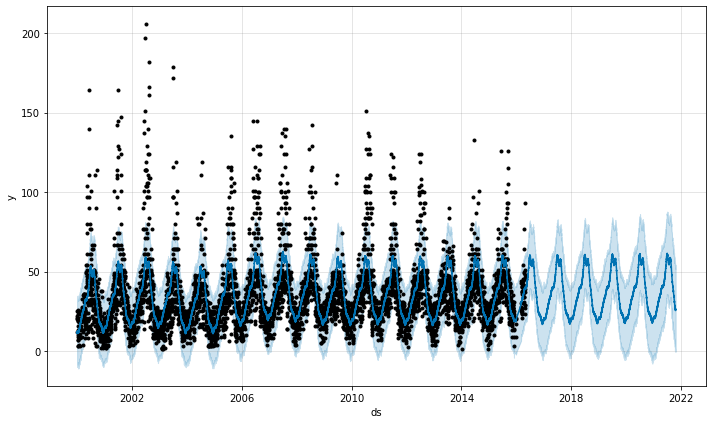

In [32]:
output = prophet_model.plot(forecast)